In [107]:
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [183]:
class Agent:
    
    def __init__(self, id, infected = False):
        self.id = id
        self.infected = infected
                   
    def hand_shake(self, other_agent):
            if other_agent.infected == True:
                self.infected = True
            elif self.infected == True:
                other_agent.infected = True
                

In [188]:
class Model:
    
    def __init__(self, num_agents, num_infected, contact_koef):
        
        self.num_agents = num_agents
        self.num_infected = num_infected
        self.K = contact_koef #Between 0..1
        self.dict_agents = {}
        self.infected_vector = np.array([num_infected], int) #For recording num_infected in all steps
        
        '''Creats agents and puts them in dictionary'''
        start_num_infected = num_infected
        for i in range(self.num_agents):
            if start_num_infected > 0:
                agent = Agent(i, True)
                start_num_infected -= 1
            else:
                agent = Agent(i)
            self.dict_agents[agent.id] = agent
  
    def step(self):
        '''Advance the model by one step.'''
        key_list = list(self.dict_agents.keys())
        random.shuffle(key_list) #Shuffles indexes to pick random pairs each step

        '''Handshakes betwen pairs of agents depending on contact_koef - K'''
        for i in range(int(len(key_list)*self.K//2)):
            hand_shaker_1 = self.dict_agents[key_list.pop()]
            hand_shaker_2 = self.dict_agents[key_list.pop()]
            hand_shaker_1.hand_shake(hand_shaker_2)
        
        '''Counts number of infected after step'''
        self.num_infected = 0
        for agent in self.dict_agents.values():
            if agent.infected: self.num_infected +=1
        self.infected_vector = np.append(self.infected_vector, self.num_infected)
            
    def get_infected(self):
        dict_infected = {}
        
        for key, value in self.dict_agents.items():
            dict_infected[key] = value.infected
        
        return dict_infected
    
    def run_simulation(self, num_steps):
        self.num_steps = num_steps
        for i in range(self.num_steps):
            self.step()
    
    def draw_plot(self, num_steps):
        x = np.arange(0, num_steps+1)
        plt.figure(figsize=(10,6))
        plt.style.use('seaborn-white')
        plt.plot(x, New_Model.infected_vector, color='r', label='Infected', linewidth=2)
        plt.plot(x, New_Model.num_agents - New_Model.infected_vector, color='g', label='Healthy', linestyle='--', linewidth=1)
        plt.xlabel('Steps')
        plt.ylabel('Number of Infected')
        plt.legend()
        plt.grid(True)


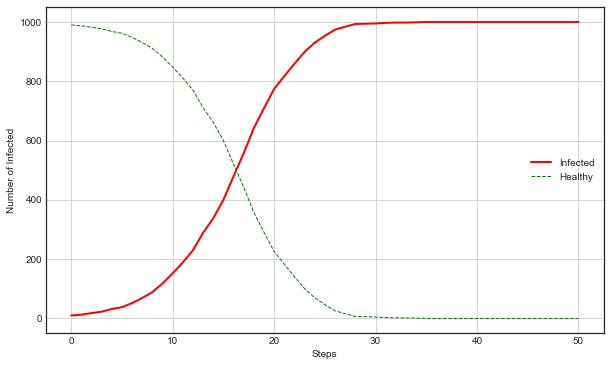

In [191]:
New_Model = Model(1000, num_infected = 10, contact_koef = .3)

steps = 50
New_Model.run_simulation(steps)
New_Model.draw_plot(steps)

